TASK 1: Analysis of SVM Kernels on Iris Dataset
Data loaded. Training shape: (120, 4), Testing shape: (30, 4)

--- Evaluating SVM with LINEAR kernel ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


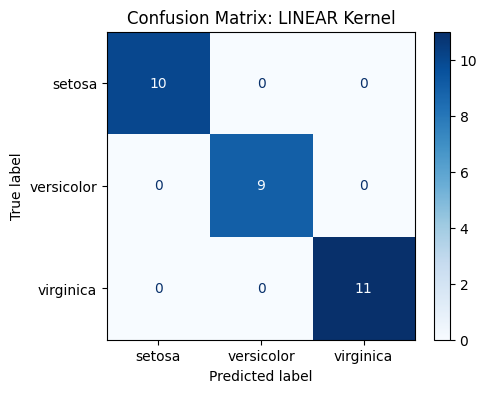



--- Evaluating SVM with POLY kernel ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


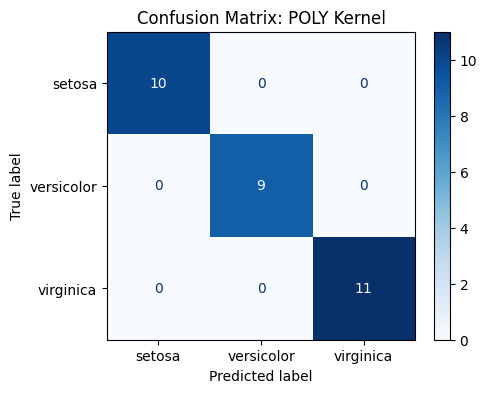



--- Evaluating SVM with RBF kernel ---
Accuracy:  1.0000
Precision: 1.0000
Recall:    1.0000
F1-Score:  1.0000


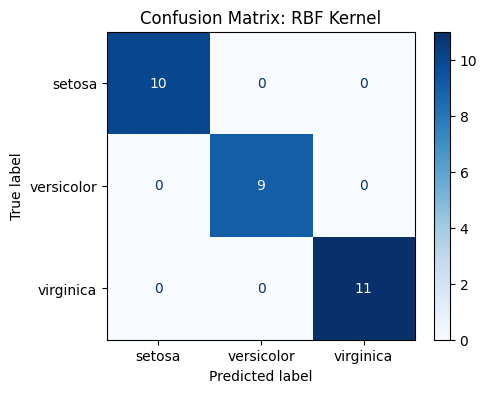



e) Conclusion on Kernel Performance:
Based on the accuracy scores, the best performing kernel is: LINEAR.
Why? On this specific small and clean dataset, the classes are likely linearly separable
or close to it. Often, Linear and RBF perform similarly well on Iris (usually 100% or near it).
If Poly performed worse, it might be overfitting or the data structure isn't complex enough for higher degrees.

TASK 2: Impact of Feature Scaling on SVM
--- Scenario 1: Without Feature Scaling ---
Training Accuracy: 0.9143
Testing Accuracy:  0.9474

--- Scenario 2: With StandardScaler ---
Training Accuracy: 0.9890
Testing Accuracy:  0.9825

C) Discussion on Feature Scaling:
Without scaling, the model achieved 94.74% accuracy.
With scaling, the model achieved 98.25% accuracy.
------------------------------
Observation: SVM calculates distances between data points to find the optimal hyperplane.
The breast cancer dataset has features with vastly different ranges (e.g., 'area' is in
hundreds/thousand

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

print("="*60)
print("TASK 1: Analysis of SVM Kernels on Iris Dataset")
print("="*60)

iris = datasets.load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Data loaded. Training shape: {X_train.shape}, Testing shape: {X_test.shape}\n")

kernels = ['linear', 'poly', 'rbf']

results = {}

for k in kernels:
    print(f"--- Evaluating SVM with {k.upper()} kernel ---")


    clf = SVC(kernel=k, degree=3)
    clf.fit(X_train, y_train)


    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    results[k] = acc

    print(f"Accuracy:  {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall:    {rec:.4f}")
    print(f"F1-Score:  {f1:.4f}")

    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)


    fig, ax = plt.subplots(figsize=(5, 4))
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(f"Confusion Matrix: {k.upper()} Kernel")
    plt.show()
    print("\n")


print("e) Conclusion on Kernel Performance:")
best_kernel = max(results, key=results.get)
print(f"Based on the accuracy scores, the best performing kernel is: {best_kernel.upper()}.")
print("Why? On this specific small and clean dataset, the classes are likely linearly separable")
print("or close to it. Often, Linear and RBF perform similarly well on Iris (usually 100% or near it).")
print("If Poly performed worse, it might be overfitting or the data structure isn't complex enough for higher degrees.")


print("\n" + "="*60)
print("TASK 2: Impact of Feature Scaling on SVM")
print("="*60)

cancer = datasets.load_breast_cancer()
X = cancer.data
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("--- Scenario 1: Without Feature Scaling ---")
svm_no_scale = SVC(kernel='rbf')
svm_no_scale.fit(X_train, y_train)

train_acc_no_scale = svm_no_scale.score(X_train, y_train)
test_acc_no_scale = svm_no_scale.score(X_test, y_test)

print(f"Training Accuracy: {train_acc_no_scale:.4f}")
print(f"Testing Accuracy:  {test_acc_no_scale:.4f}")

print("\n--- Scenario 2: With StandardScaler ---")

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_scaled = SVC(kernel='rbf')
svm_scaled.fit(X_train_scaled, y_train)

train_acc_scaled = svm_scaled.score(X_train_scaled, y_train)
test_acc_scaled = svm_scaled.score(X_test_scaled, y_test)

print(f"Training Accuracy: {train_acc_scaled:.4f}")
print(f"Testing Accuracy:  {test_acc_scaled:.4f}")

print("\nC) Discussion on Feature Scaling:")
print(f"Without scaling, the model achieved {test_acc_no_scale*100:.2f}% accuracy.")
print(f"With scaling, the model achieved {test_acc_scaled*100:.2f}% accuracy.")
print("-" * 30)
print("Observation: SVM calculates distances between data points to find the optimal hyperplane.")
print("The breast cancer dataset has features with vastly different ranges (e.g., 'area' is in")
print("hundreds/thousands, while 'smoothness' is < 0.1). Without scaling, the larger features")
print("dominate the distance calculation, making the SVM biased and less effective.")
print("Scaling brings all features to a mean of 0 and variance of 1, allowing the RBF kernel")
print("to weigh features equally, drastically improving performance.")
